## Tutorial 1 - Autoencoder

In this example, we will use an autoencoder to 'learn' to recrate hand written digits.

In [1]:
import numpy as np
import pandas as pd

### Load and normalize our data

In [2]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


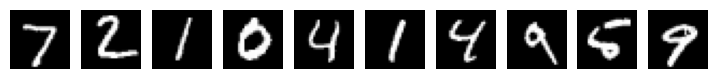

In [3]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

In [28]:
performance = pd.DataFrame({"model": [], "MSE-loss":[] })

### Create an autoencoder model.

In [39]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 6 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 500)               392500    
                                                                 
 dense_65 (Dense)            (None, 300)               150300    
                                                                 
 dense_66 (Dense)            (None, 100)               30100     
                                                                 
 dense_67 (Dense)            (None, 6)                 606       
                                                                 
 dense_68 (Dense)            (None, 100)               700       
                                                                 
 dense_69 (Dense)            (None, 300)               30300     
                                                                 
 dense_70 (Dense)            (None, 500)              

### Train the autoencoder model.

In [40]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 8s 15ms/step - loss: 0.2085 - val_loss: 0.1583
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1524 - val_loss: 0.1475
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1453 - val_loss: 0.1430
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1416 - val_loss: 0.1405
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1390 - val_loss: 0.1389
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1369 - val_loss: 0.1364
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1352 - val_loss: 0.1352
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1336 - val_loss: 0.1337
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1323 - val_loss: 0.1330
Epoch 10/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1311 - val_lo

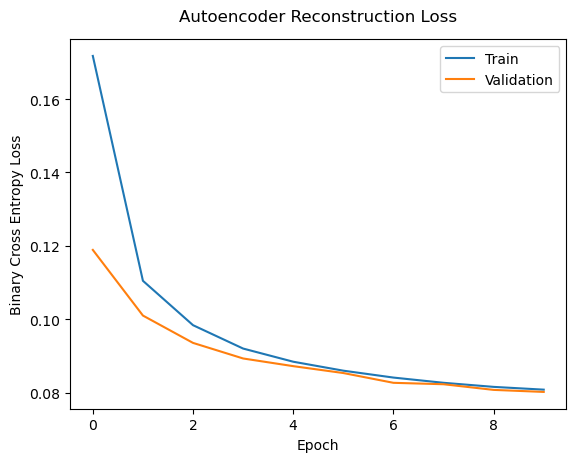

In [32]:
#6
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

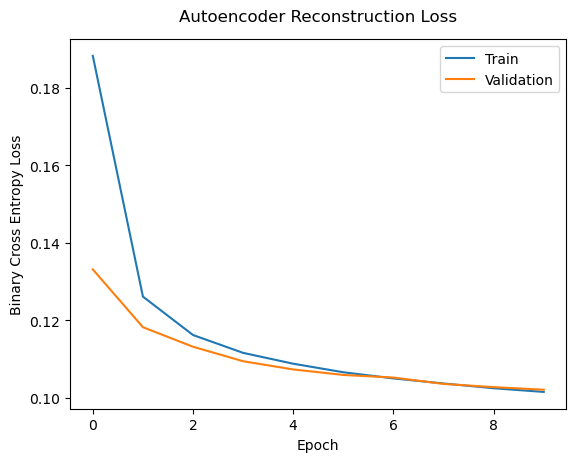

In [17]:
#16N
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

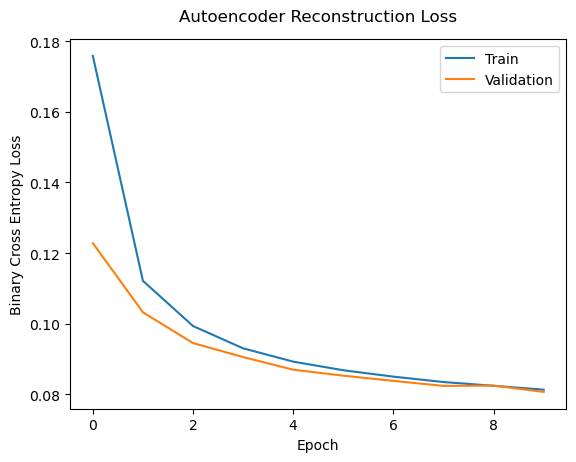

In [22]:
#100N
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

In [23]:
reconstructed_images = autoencoder.predict(test_images)

313/313 [==============================] - 1s 4ms/step


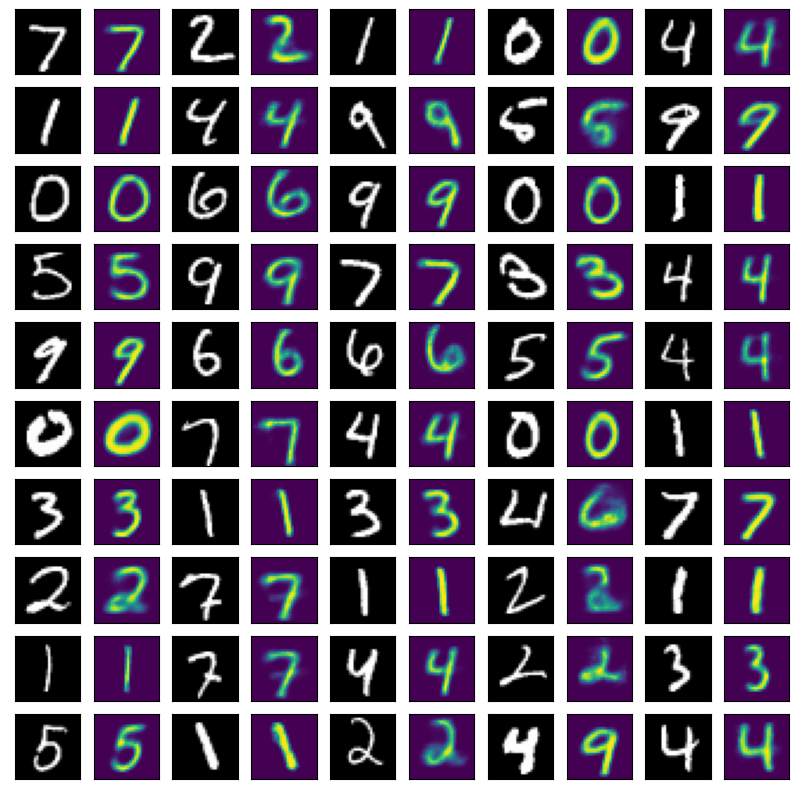

In [13]:
#6N
images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

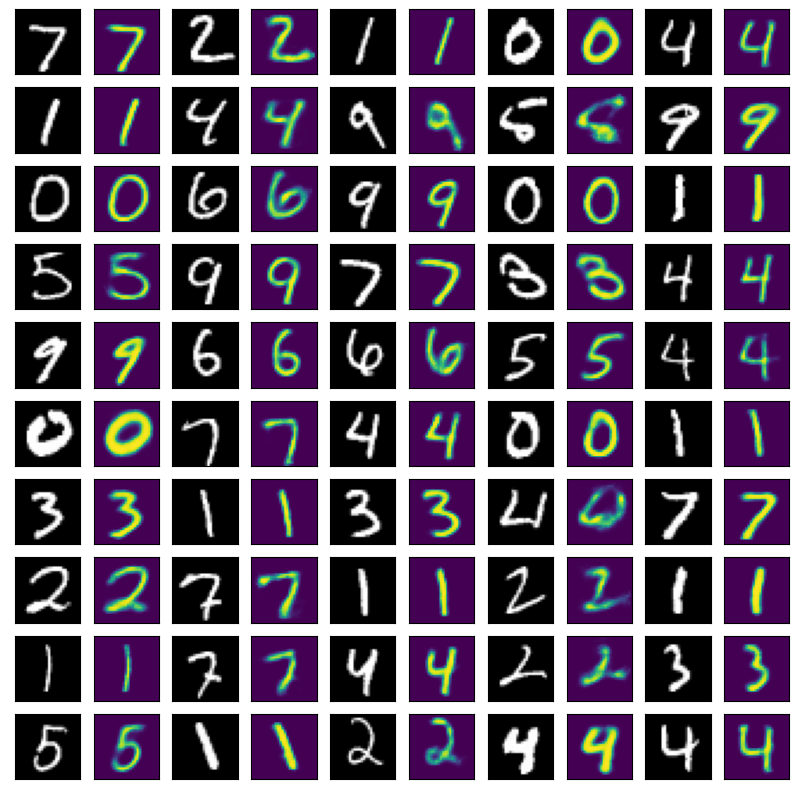

In [19]:
#16N
images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

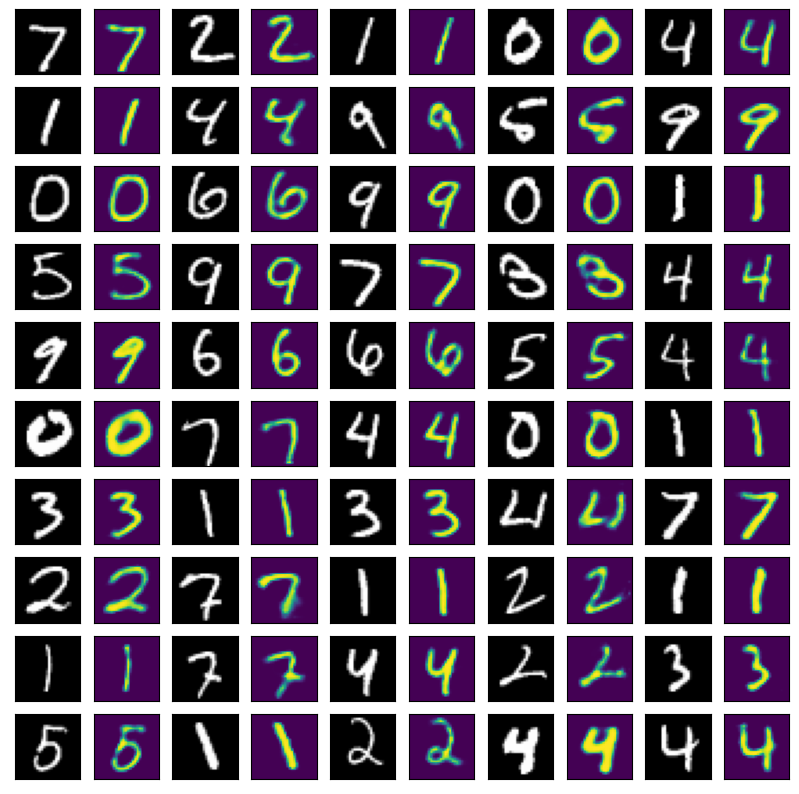

In [24]:
#100N
images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [41]:
mse = autoencoder.evaluate(test_images, test_images)

313/313 [==============================] - 1s 5ms/step - loss: 0.1325


In [42]:
performance = pd.concat([performance, pd.DataFrame({'model':"6N", 'MSE-loss': mse}, index=[0])])
performance

,model,MSE-loss
0,100N,0.080213
0,16N,0.097648
0,6N,0.132509


### Save the autoencoder for later user.

In [43]:
autoencoder.save('initially_trained_autoencoder.h5')

### Summary

After comparing the above results we can say that a bottle neck with 100 nuerons resulted in low mean square error so this model is better performing. while comparing each image with other i was able to summarize this:
1) comparision between  6 and 16 nuerons resulted in difference of numbers 4,2,7,5 and 16N nuerons model resulted in clear images.
2) comparision between  6 and 100 nuerons resulted in difference of numbers 4,2,7 and 100N nuerons model resulted in clear images.
3) comparision between  16 and 100 nuerons resulted in difference of numbers 4,5 and 100N nuerons model resulted in clear images.
and there is difference in graphs of binary classification loss too.


So from these results i infer that 100N nuerons resulted in better results